<a href="https://colab.research.google.com/github/cazathoth/tfm/blob/main/tfm_jvasquez_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#descarga librerias.
install.packages("tidyverse")
install.packages("arrow")
install.packages("lubridate")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#cargo librerias a utilizar.
library("tidyverse")
library("arrow")
library("lubridate")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp




In [3]:
#creo directorio y descargo dataset con datos de urgencias respiratorias
dir.create("descargas")
url <- "https://datos.gob.cl/dataset/606ef5bb-11d1-475b-b69f-b980da5757f4/resource/ae6c9887-106d-4e98-8875-40bf2b836041/download/at_urg_respiratorio_semanal.parquet"
nombre_temporal <- "descargas/at_urg_respiratorio_semanal.parquet"
download.file(url, nombre_temporal)

In [47]:
df_urgr_esp_semanal <- read_parquet("descargas/at_urg_respiratorio_semanal.parquet")

In [48]:
df_urgr_esp_semanal<- df_urgr_esp_semanal %>% filter (RegionCodigo %in% c(8,4,13) & Anio == 2019 & SemanaEstadistica == 11 & EstablecimientoCodigo == 113818)
count(df_urgr_esp_semanal)
head(df_urgr_esp_semanal,50)

n
<int>
8


EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,⋯,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
113818,SAPU Paine,13,Región Metropolitana de Santiago,13404,Paine,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,⋯,2019,11,4,IRA Alta (J00-J06),144,7,29,33,74,1
113818,SAPU Paine,13,Región Metropolitana de Santiago,13404,Paine,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,⋯,2019,11,32,HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,0,0,0,0,0,0
113818,SAPU Paine,13,Región Metropolitana de Santiago,13404,Paine,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,⋯,2019,11,5,Influenza (J09-J11),0,0,0,0,0,0
113818,SAPU Paine,13,Región Metropolitana de Santiago,13404,Paine,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,⋯,2019,11,9,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)",3,0,0,1,1,1
113818,SAPU Paine,13,Región Metropolitana de Santiago,13404,Paine,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,⋯,2019,11,3,TOTAL CAUSAS SISTEMA RESPIRATORIO,185,8,36,42,90,9
113818,SAPU Paine,13,Región Metropolitana de Santiago,13404,Paine,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,⋯,2019,11,7,Bronquitis/bronquiolitis aguda (J20-J21),21,1,6,5,7,2
113818,SAPU Paine,13,Región Metropolitana de Santiago,13404,Paine,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,⋯,2019,11,8,Crisis obstructiva bronquial (J40-J46),14,0,0,3,7,4
113818,SAPU Paine,13,Región Metropolitana de Santiago,13404,Paine,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,⋯,2019,11,6,Neumonía (J12-J18),3,0,1,0,1,1


In [5]:
df_urgr_esp_semanal %>% select(OrdenCausa, Causa)%>%distinct()%>%arrange(OrdenCausa)

OrdenCausa,Causa
<int>,<chr>
3,TOTAL CAUSAS SISTEMA RESPIRATORIO
4,IRA Alta (J00-J06)
5,Influenza (J09-J11)
6,Neumonía (J12-J18)
7,Bronquitis/bronquiolitis aguda (J20-J21)
8,Crisis obstructiva bronquial (J40-J46)
9,"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)"
10,"Covid-19, Virus no identificado U07.2"
11,"Covid-19, Virus identificado U07.1"


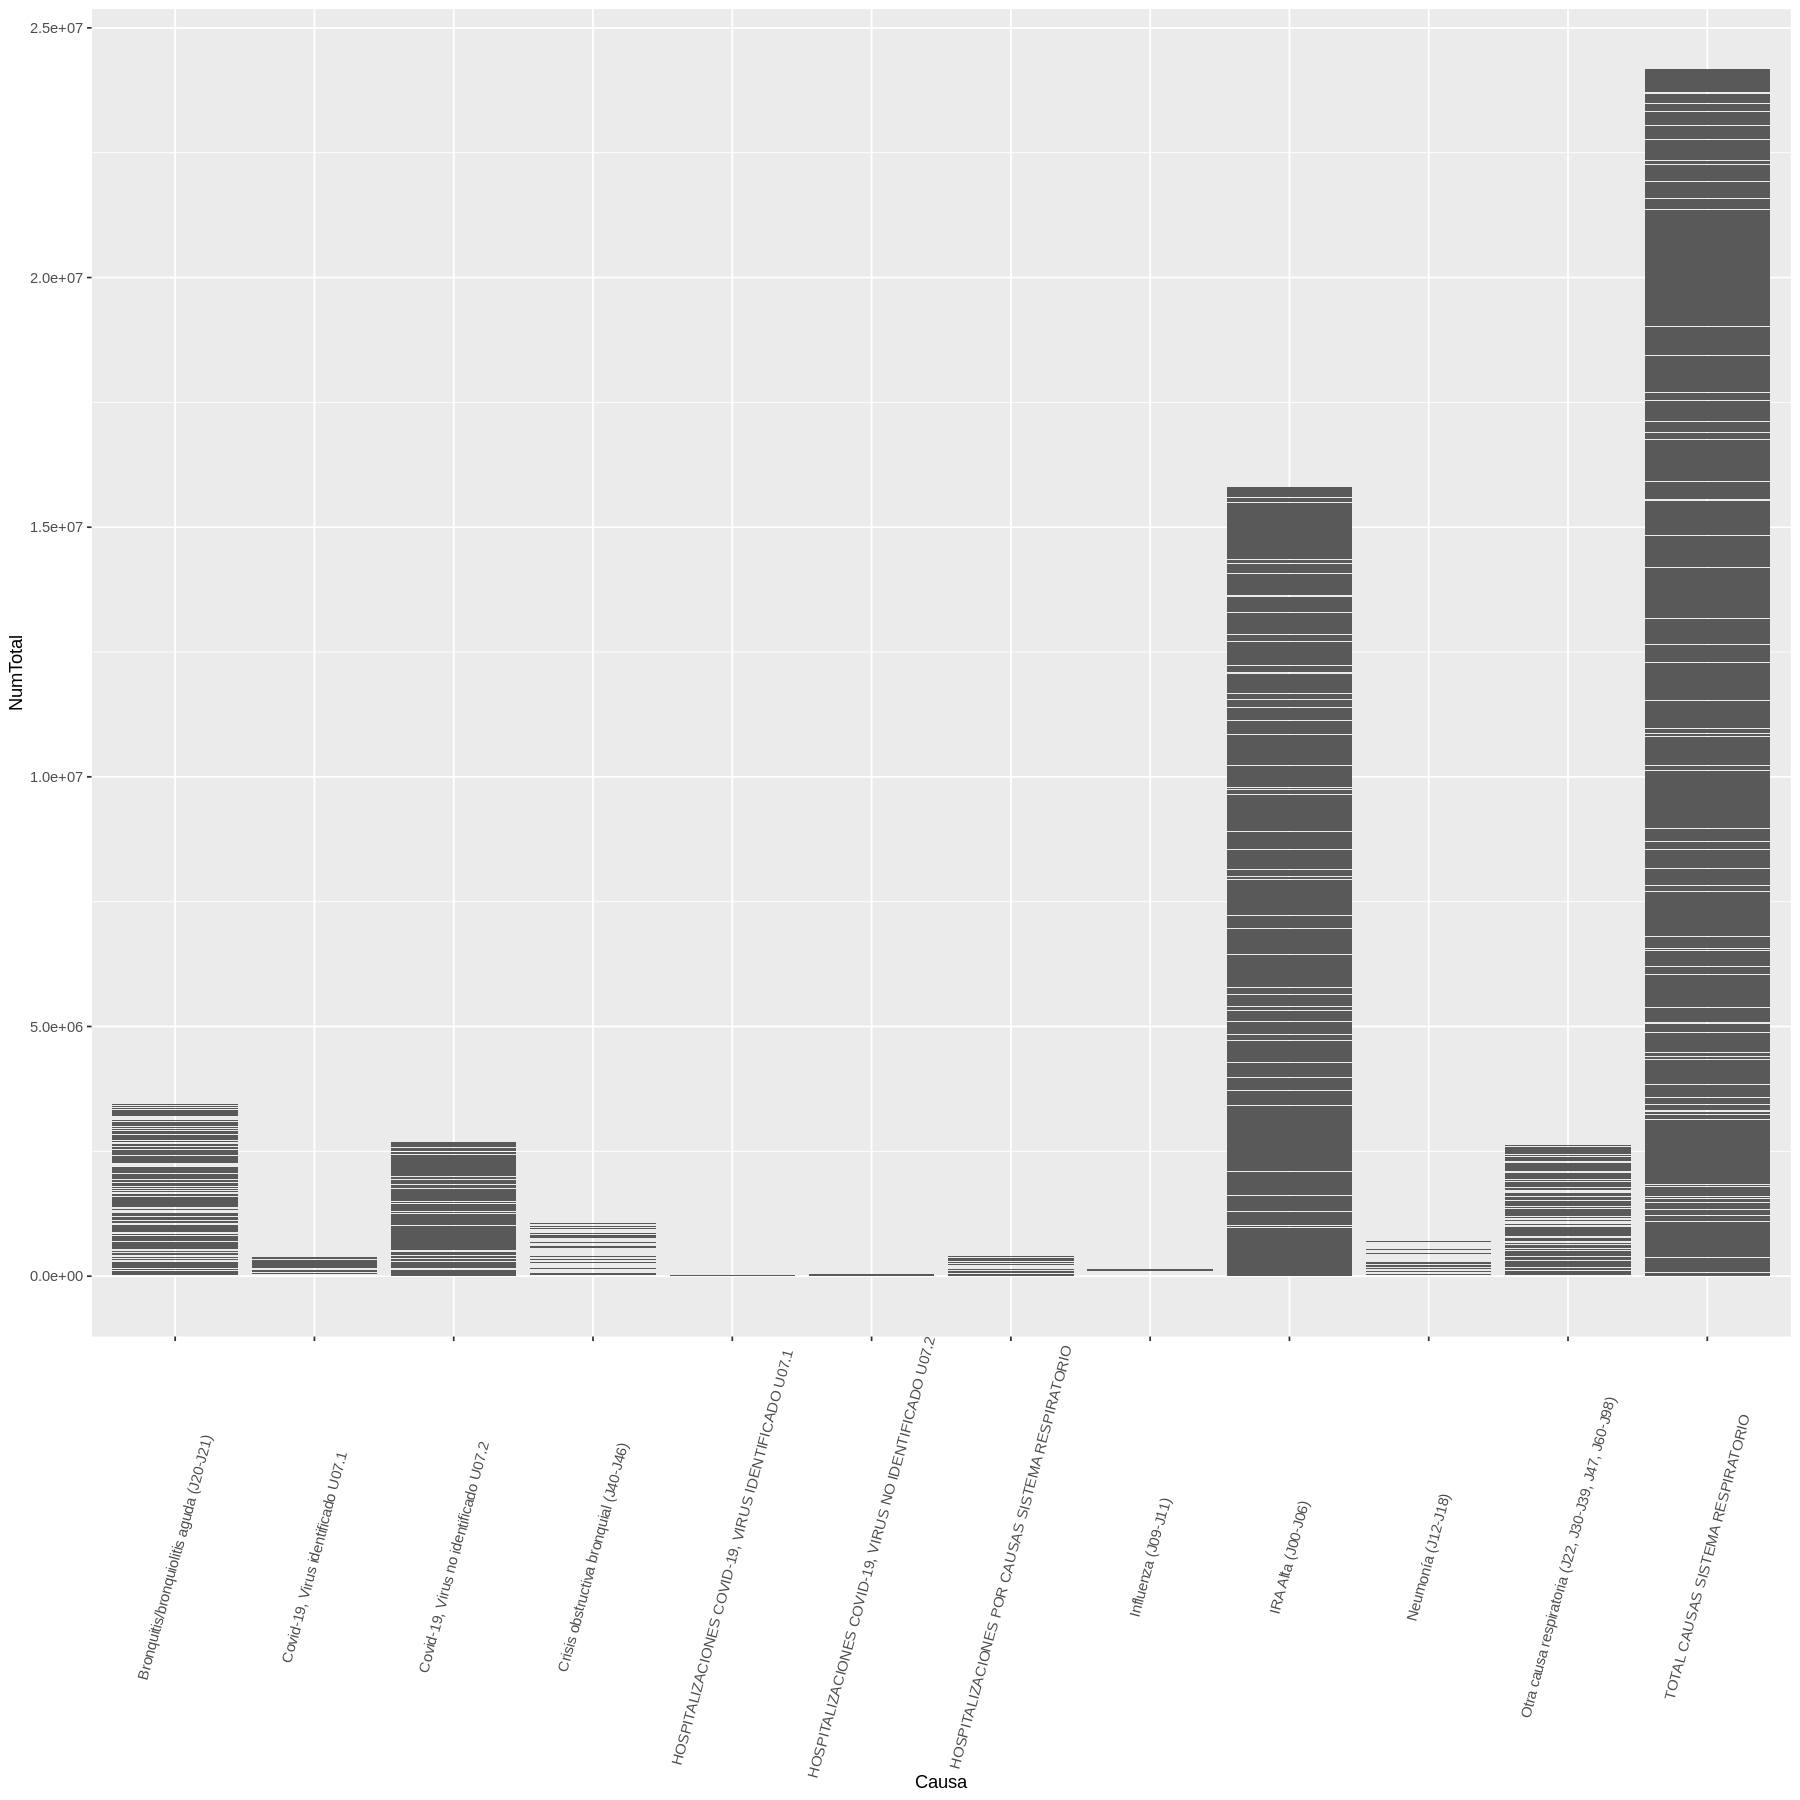

In [23]:
options(repr.plot.width = 15, repr.plot.height = 15)
ggplot(df_urgr_esp_semanal, aes(x=Causa, y= NumTotal)) + geom_bar(stat="identity") +
theme(axis.text.x = element_text(angle = 75, vjust = .5))